In [1]:
import sys
import time
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py
import seaborn as sns
from numba import jit,njit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from pylab import savefig

start_time = time.time()

In [2]:
f = h5py.File('small_QL_g_s1_p0.h5', 'r')

r = f['scales']['r']['1.0']
z = f['scales']['z']['1.0']
th = f['scales']['th']['1.0']
t = f['scales']['sim_time']

th = np.asarray(th)
z = np.asarray(z)
r = np.asarray(r)
t = np.asarray(t)

N_r = r.shape[0]
N_th = th.shape[0]
N_z = z.shape[0]
N_t = t.shape[0]

In [3]:
# Q = np.zeros((N_th,N_t), dtype = np.float64)

@njit(fastmath = True, parallel = True)
def compute_eigen(r, z, N_th, N_r, N_z, v_r_f, v_theta_f, v_z_f):
    dz = z[1]-z[0]
#     kTh = np.arange(N_th, dtype=np.int32)
#     kTh = np.reshape(kTh,(kTh.shape[0],1))
    Q = np.zeros((N_th,N_z),dtype=np.float64)    
#     print(Q.shape)
#     print("Q: ",type(Q))
#     print("Q[0]: ",type(Q[0][0]))

    for m in range(N_th):
        # print("Wavenumber azimuthal: ",m)
        #print(type(eigen_val))
        for k in range(N_z):
            # print("Wavenumber axial: ",k)
            eigen_val = 0.0
            for R in range(N_r):
                # print("R: ",R)
                if R==0:
                    rdr = r[R]*(r[1]-r[0]) 
                else:
                    rdr = r[R]*(r[R]-r[R-1])

                Q_v_r = v_r_f[k][m][R]
                Q_v_theta = v_theta_f[k][m][R]
                Q_v_z = v_z_f[k][m][R]

                power_amplitude = (Q_v_r)*np.conj(Q_v_r) + (Q_v_theta)*np.conj(Q_v_theta) + (Q_v_z)*np.conj(Q_v_z)
                # print(type(power_amplitude))
                power_amplitude = power_amplitude.real
                # print(power_amplitude)
                # print(power_amplitude.shape
                eigen_val += (rdr*power_amplitude)
            Q[m][k] = 2*(np.pi)*eigen_val
 
#     par_func = np.vectorize(compute_mode)    
#     Q = par_func(kTh);
#     print(Q.shape)
#     print("Q: ",type(Q))
    return Q


TimeStamp:  0 

Q_t:  [[3.54378476e-03 4.91453696e-33 4.06587058e-34 1.63512071e-34
  4.06587058e-34 4.91453696e-33]
 [1.01079136e-33 4.71313420e-01 1.88092981e-33 1.02183629e-32
  2.73221337e-33 5.01610927e-01]
 [5.52950280e-34 3.29102242e-33 3.79691466e-34 2.03286414e-34
  2.78984660e-34 7.23194851e-33]
 [3.57489955e-34 5.31859503e-33 6.98329707e-34 1.20329445e-33
  7.74933521e-34 5.56012833e-33]
 [5.52950280e-34 7.23194851e-33 2.78984660e-34 2.03286414e-34
  3.79691466e-34 3.29102242e-33]
 [1.76219745e-33 5.01610927e-01 3.84956061e-33 8.43567720e-33
  2.64693595e-33 4.71313420e-01]]
Q Shape:  (6, 6)


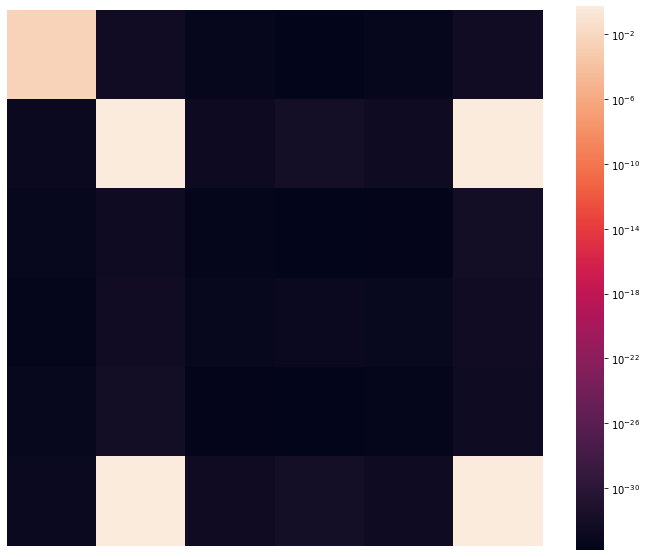


TimeStamp:  1 

Q_t:  [[3.67970113e-03 5.25885530e-32 3.37842540e-03 6.59027013e-36
  3.37842540e-03 5.25885530e-32]
 [1.46100718e-33 5.05760985e-03 2.13127525e-31 7.25392898e-35
  2.41971965e-31 5.33238080e-03]
 [1.60389806e-11 4.03535165e-31 7.42247395e-14 7.58924664e-36
  6.57944529e-14 6.93823197e-31]
 [1.39733846e-35 5.36144057e-35 1.42941761e-35 1.67971113e-35
  8.30061373e-36 5.50487733e-35]
 [1.60389806e-11 6.93823197e-31 6.57944529e-14 7.58924664e-36
  7.42247395e-14 4.03535165e-31]
 [1.41040987e-33 5.33238080e-03 2.41644223e-31 4.68826361e-35
  2.13032551e-31 5.05760985e-03]]
Q Shape:  (6, 6)


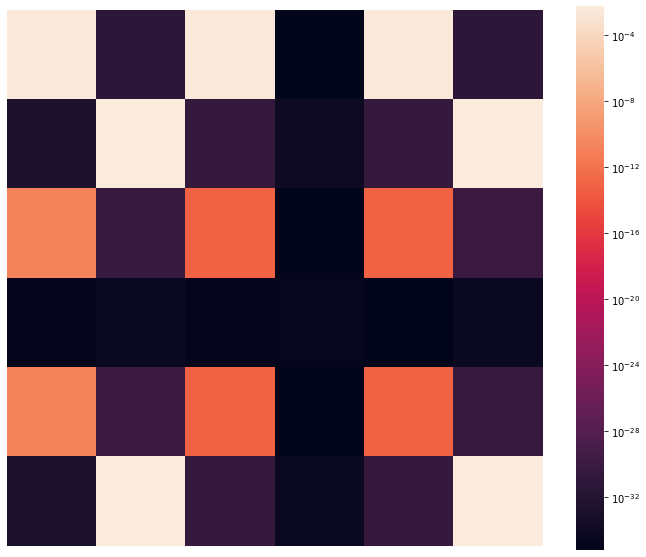


TimeStamp:  2 

Q_t:  [[3.58071844e-03 6.41861923e-32 1.36365233e-03 1.22673963e-35
  1.36365233e-03 6.41861923e-32]
 [7.16843411e-34 7.55059905e-04 4.54681788e-32 9.17340162e-36
  3.46478216e-32 8.03509588e-04]
 [6.05627692e-12 1.02868398e-31 2.03346906e-14 2.50889453e-36
  1.57400720e-14 9.80315467e-32]
 [5.04180983e-36 4.85994584e-36 4.79027640e-36 1.11851071e-36
  3.40544850e-36 6.03335347e-36]
 [6.05627692e-12 9.80315467e-32 1.57400720e-14 2.50889453e-36
  2.03346906e-14 1.02868398e-31]
 [7.26863060e-34 8.03509588e-04 3.46827435e-32 7.00885979e-36
  4.57027580e-32 7.55059905e-04]]
Q Shape:  (6, 6)


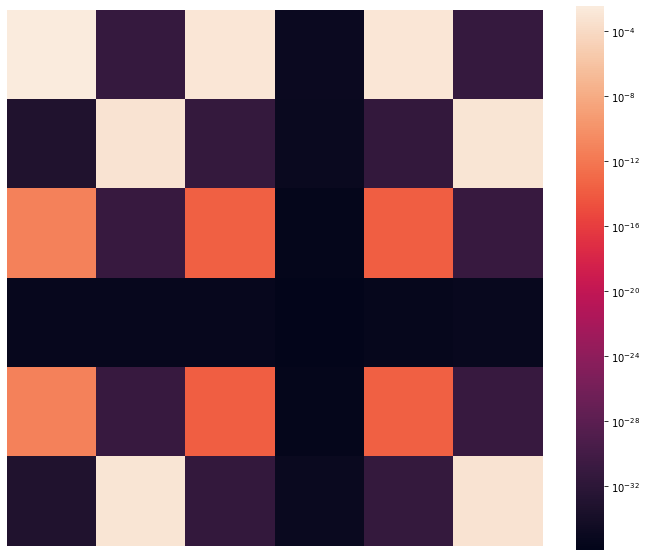


TimeStamp:  3 

Q_t:  [[3.57694098e-03 5.19546178e-32 5.12207012e-04 1.97393795e-36
  5.12207012e-04 5.19546178e-32]
 [3.53217462e-34 2.50659605e-04 2.17015001e-32 3.70021698e-36
  1.36342985e-32 3.00629783e-04]
 [2.29862165e-12 5.48332523e-32 5.88041136e-15 9.83707548e-37
  2.99534055e-15 3.54687062e-32]
 [5.06299382e-37 4.24192853e-36 6.91734450e-37 1.84227931e-36
  7.30911379e-37 2.47230786e-36]
 [2.29862165e-12 3.54687062e-32 2.99534055e-15 9.83707548e-37
  5.88041136e-15 5.48332523e-32]
 [3.57357657e-34 3.00629783e-04 1.36463495e-32 2.45209015e-36
  2.16663671e-32 2.50659605e-04]]
Q Shape:  (6, 6)


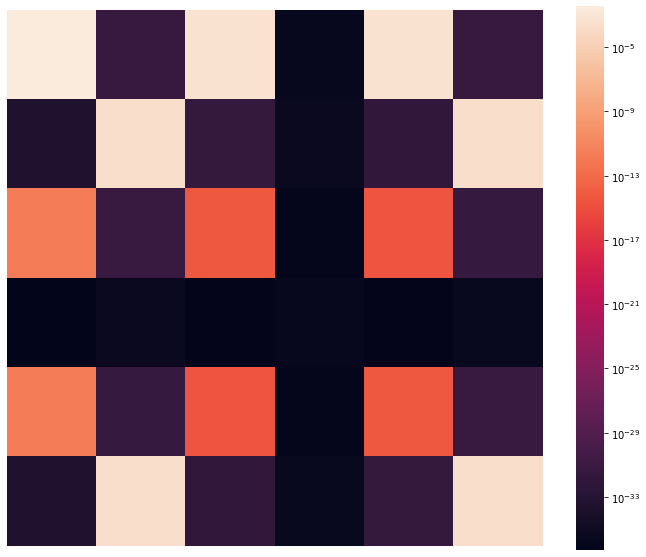


TimeStamp:  4 

Q_t:  [[3.56914302e-03 2.72157966e-32 1.92471714e-04 1.76158006e-36
  1.92471714e-04 2.72157966e-32]
 [2.41908164e-34 9.66531565e-05 1.18998875e-32 1.33245060e-36
  9.04705370e-33 1.25806490e-04]
 [8.75323638e-13 3.09973377e-32 1.97752463e-15 1.35649620e-36
  5.57068595e-16 1.75906421e-32]
 [1.19829890e-36 1.17654425e-36 1.12645793e-36 6.31436813e-37
  8.98181834e-37 1.33899557e-36]
 [8.75323638e-13 1.75906421e-32 5.57068595e-16 1.35649620e-36
  1.97752463e-15 3.09973377e-32]
 [2.33568734e-34 1.25806490e-04 9.02916529e-33 1.02381983e-36
  1.19392551e-32 9.66531565e-05]]
Q Shape:  (6, 6)


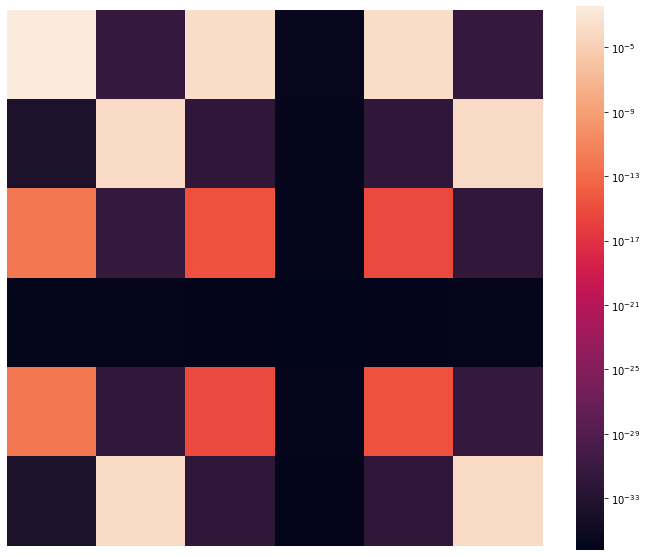


TimeStamp:  5 

Q_t:  [[3.56097684e-03 1.20873132e-32 7.23269720e-05 3.04888535e-36
  7.23269720e-05 1.20873132e-32]
 [1.46125949e-34 3.83089007e-05 6.51692645e-33 1.69353689e-36
  5.57028663e-33 5.24153827e-05]
 [3.33617181e-13 1.73106649e-32 6.98396371e-16 1.82923277e-36
  1.14323318e-16 1.01247374e-32]
 [1.42205342e-37 6.48894918e-37 2.61554036e-37 2.86998855e-37
  3.06890328e-37 5.82349878e-37]
 [3.33617181e-13 1.01247374e-32 1.14323318e-16 1.82923277e-36
  6.98396371e-16 1.73106649e-32]
 [1.45430992e-34 5.24153827e-05 5.56751475e-33 4.00921787e-37
  6.52410166e-33 3.83089007e-05]]
Q Shape:  (6, 6)


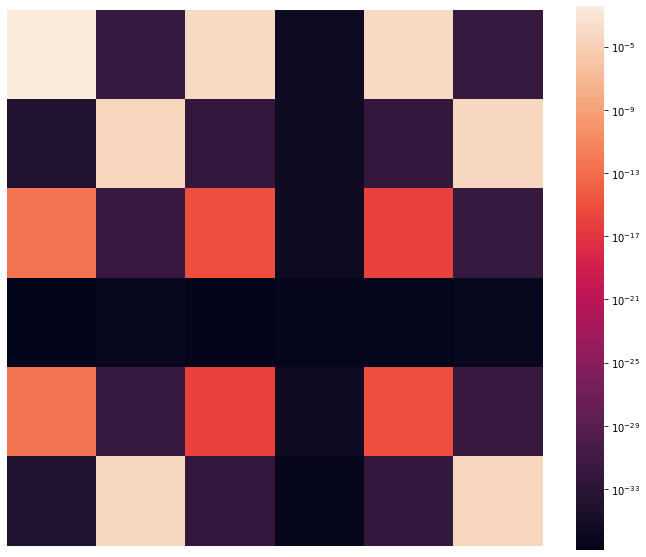


TimeStamp:  6 

Q_t:  [[3.55500011e-03 5.04958231e-33 2.72070849e-05 4.49368742e-37
  2.72070849e-05 5.04958231e-33]
 [7.00188680e-35 1.53726447e-05 3.41440580e-33 7.79240144e-37
  3.22061898e-33 2.16829694e-05]
 [1.27376322e-13 8.81644551e-33 2.46525468e-16 2.01188993e-37
  2.73371846e-17 5.53407964e-33]
 [1.20610940e-37 5.88129017e-37 2.46135917e-37 4.18034106e-38
  2.59379199e-37 5.15853682e-37]
 [1.27376322e-13 5.53407964e-33 2.73371846e-17 2.01188993e-37
  2.46525468e-16 8.81644551e-33]
 [6.92578556e-35 2.16829694e-05 3.21769779e-33 8.77058972e-37
  3.41604989e-33 1.53726447e-05]]
Q Shape:  (6, 6)


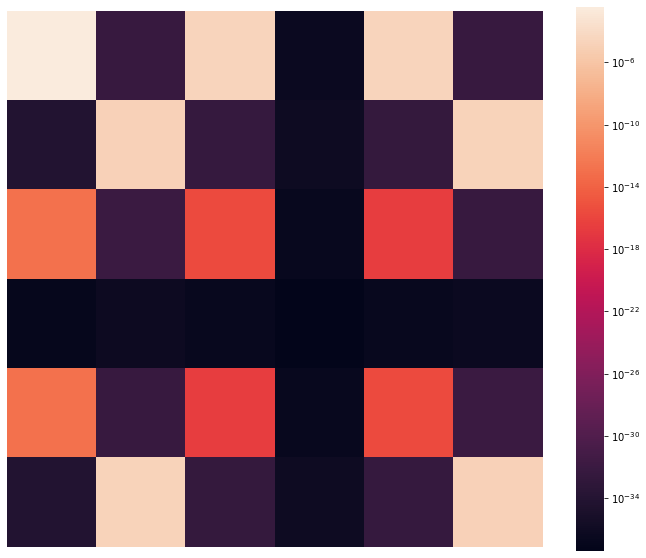


TimeStamp:  7 

Q_t:  [[3.55098956e-03 1.48925667e-33 1.02277864e-05 4.49770780e-36
  1.02277864e-05 1.48925667e-33]
 [3.81087483e-35 6.20656134e-06 1.68719099e-33 2.50259040e-37
  1.73022948e-33 8.91872784e-06]
 [4.86261260e-14 4.71490542e-33 8.57439314e-17 9.60859589e-37
  7.49547424e-18 2.78901796e-33]
 [2.00876472e-37 1.74636106e-37 2.89672456e-37 1.00837371e-37
  2.73819175e-37 1.67690153e-37]
 [4.86261260e-14 2.78901796e-33 7.49547424e-18 9.60859589e-37
  8.57439314e-17 4.71490542e-33]
 [3.81954383e-35 8.91872784e-06 1.72645326e-33 1.32396214e-37
  1.68731998e-33 6.20656134e-06]]
Q Shape:  (6, 6)


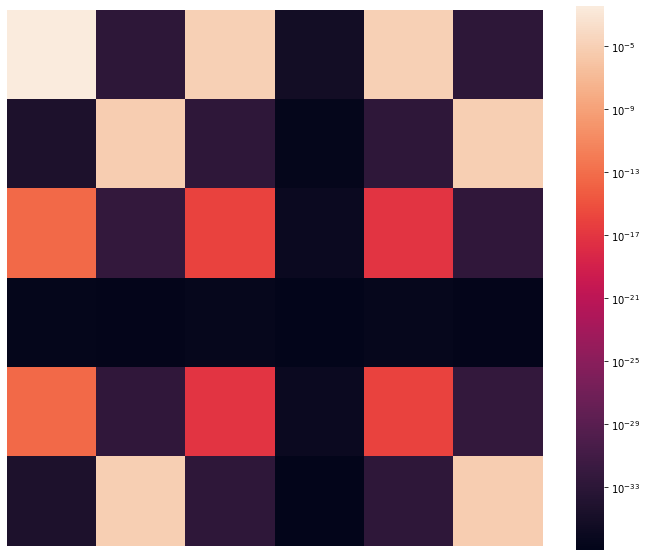


TimeStamp:  8 

Q_t:  [[3.54835062e-03 4.00190530e-34 3.84502390e-06 1.72220965e-36
  3.84502390e-06 4.00190530e-34]
 [1.61111227e-35 2.51639694e-06 8.53345665e-34 5.43294535e-38
  9.01225160e-34 3.65742619e-06]
 [1.85696189e-14 2.34255534e-33 2.94136444e-17 3.22181210e-37
  2.25286078e-18 1.43516477e-33]
 [1.16840096e-37 1.91338070e-37 2.26555458e-37 1.36423354e-37
  2.19341264e-37 2.18675694e-37]
 [1.85696189e-14 1.43516477e-33 2.25286078e-18 3.22181210e-37
  2.94136444e-17 2.34255534e-33]
 [1.59293294e-35 3.65742619e-06 9.01633142e-34 8.37298745e-38
  8.55211315e-34 2.51639694e-06]]
Q Shape:  (6, 6)


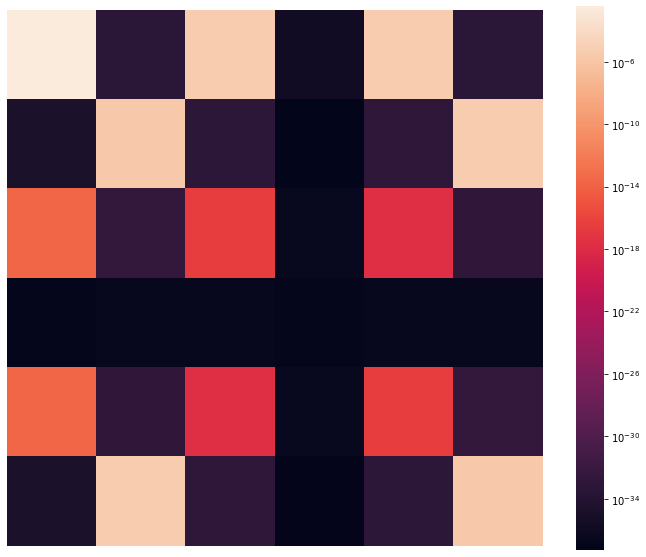


TimeStamp:  9 

Q_t:  [[3.54661581e-03 1.05433066e-34 1.44660655e-06 1.71368156e-36
  1.44660655e-06 1.05433066e-34]
 [8.25960496e-36 1.02361067e-06 4.03039029e-34 1.21598498e-37
  4.43973575e-34 1.49815624e-06]
 [7.09814384e-15 1.14063081e-33 9.99070866e-18 1.06094911e-36
  7.12688357e-19 7.29087495e-34]
 [1.65149448e-37 2.57362531e-37 1.24818087e-37 3.73912555e-37
  1.25668967e-37 2.59079426e-37]
 [7.09814384e-15 7.29087495e-34 7.12688357e-19 1.06094911e-36
  9.99070866e-18 1.14063081e-33]
 [8.31274722e-36 1.49815624e-06 4.43218123e-34 1.26094140e-37
  4.02154356e-34 1.02361067e-06]]
Q Shape:  (6, 6)


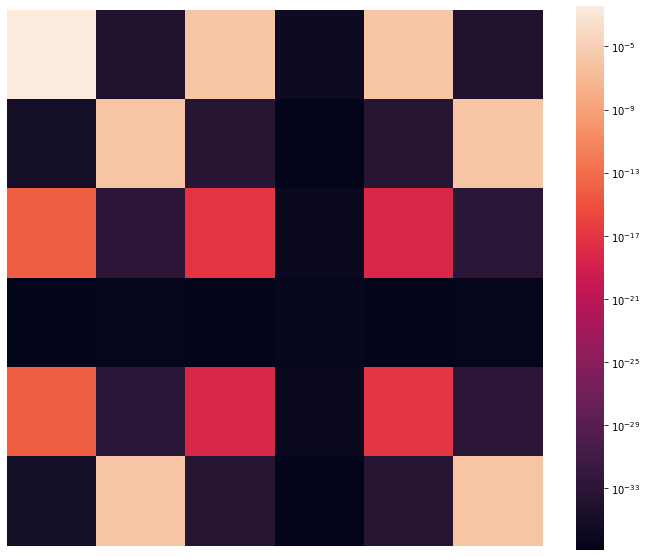

Time Duration: 5.710721254348755


In [4]:
for time_stamp in range(N_t):
    print("\nTimeStamp: ", time_stamp, "\n")    

    ul = f['tasks']['ul'][time_stamp]
    uh = f['tasks']['uh'][time_stamp]

    vl = f['tasks']['vl'][time_stamp]
    vh = f['tasks']['vh'][time_stamp]

    wl = f['tasks']['wl'][time_stamp]
    wh = f['tasks']['wh'][time_stamp]

    ul = np.asarray(ul)
    uh = np.asarray(uh)

    vl = np.asarray(vl)
    vh = np.asarray(vh)

    wl = np.asarray(wl)
    wh = np.asarray(wh)

    v_r = ul + uh
    v_theta = vl + vh
    v_z = wl + wh

    # print("v_r shape: ",v_r.shape)
    # print("v_theta shape: ",v_theta.shape)
    # print("v_z shape: ",v_z.shape)

    v_r_f = np.fft.fft2(v_r, axes=(0,1))
    v_theta_f = np.fft.fft2(v_theta, axes=(0,1))
    v_z_f = np.fft.fft2(v_z, axes=(0,1))
    
    Q_t = np.zeros((N_th,N_z),dtype=np.float64)
    Q_t = compute_eigen(r, z, N_th, N_r, N_z, v_r_f, v_theta_f, v_z_f)
    np.savetxt(str(time_stamp)+".txt", Q_t)
    print("Q_t: ",Q_t)
    print("Q Shape: ",Q_t.shape)
    
    fig = plt.figure()
    fig.set_figwidth(12)
    fig.set_figheight(10)
    
    svm = sns.heatmap(Q_t, cbar=True, square=True, xticklabels=False, yticklabels=False, norm=LogNorm())
#     fig = svm.get_figure()    
#     fig.savefig(str(time_stamp)+'.png', dpi=400)
    file_name = str(time_stamp)+".png"
    plt.savefig(file_name, facecolor='white')
    plt.show()

#     fig = plt.figure()
    
#     ax = plt.axes(projection ='3d')
#     ax = Axes3D(fig)
                
#     ax.set_xlabel(r'$\theta$', fontsize=8)
#     ax.set_ylabel(r'$z$', fontsize=8)
#     ax.set_zlabel(r'$\lambda$', fontsize=10)

#     surf = ax.plot_surface(th, z, Q_t, cmap='viridis')
#     file_name = str(time_stamp) +".png"
#     plt.savefig(file_name)
#     plt.show()

f.close()
end_time = time.time()
print('Time Duration: {}'.format(end_time - start_time))